## TK's data

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import caiman as cm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
%load_ext autoreload
%autoreload 2
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)

In [3]:
from trefide.temporal import TrendFilter
def spk_peaks(y, thres):
    peak = np.logical_and(y[1:-1]>y[0:-2], y[1:-1]>y[2:])
    peak = np.logical_and(y[1:-1]>thres, peak)
    locs=np.array(np.where(peak))+1
    return locs.flatten()

### Cell #1

In [4]:
folder = 'Data/SimultaneousEphys_TK/09212017Fish1-1/'
ephys = np.load(folder + 'ephys.npy')
frameTime = np.load(folder + 'frame_timing.npy')
voltr = 1 - np.load(folder + 'imaging_signal.npy')
filt = TrendFilter(len(voltr))
denoised_voltr = filt.denoise(voltr)
# plt.figure(figsize=(20, 3))
# plt.plot(frameTime/6000, voltr)
# plt.plot(np.arange(len(ephys))/6000, ephys/20+0.07)
# plt.plot(frameTime/6000, denoised_voltr)
# # plt.ylim([-0.03, 0.07])
# # plt.xlim(20,25)
# plt.show()

In [5]:
ephys = ephys - np.percentile(ephys, 50)
thres = ephys.std() * 7
spkTime = spk_peaks(ephys, thres)
spk_counts, _ = np.histogram(spkTime, bins=frameTime)

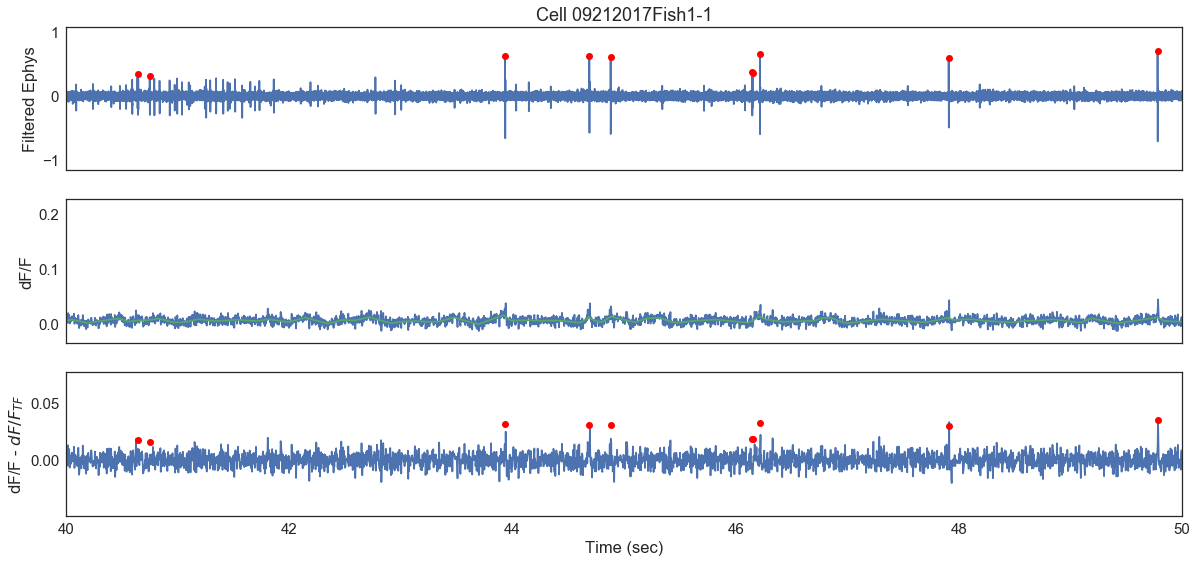

In [6]:
fig, ax = plt.subplots(3, 1, figsize = (20, 9), sharex='all')
ax[0].plot(np.arange(len(ephys))/6000, ephys)
ax[0].plot(spkTime/6000, ephys[spkTime], 'or')
ax[0].set_ylabel('Filtered Ephys')
ax[0].set_title('Cell 09212017Fish1-1')

ax[1].plot(frameTime/6000, voltr)
ax[1].plot(frameTime/6000, denoised_voltr)
ax[1].set_ylabel('dF/F')

ax[2].plot(frameTime/6000, voltr- denoised_voltr)
ax[2].plot(spkTime/6000, ephys[spkTime]/20, 'or')
ax[2].set_ylabel(r'dF/F - $dF/F_{TF}$')
ax[2].set_xlabel('Time (sec)')

ax[2].set_xlim([40, 50])
plt.show()

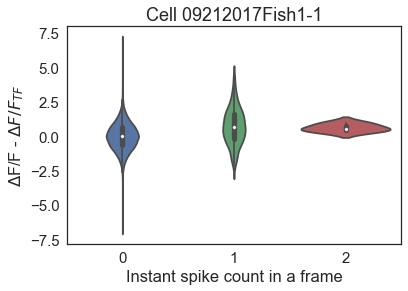

In [7]:
diff = (voltr - denoised_voltr)
diff = (diff - diff.mean())/diff.std()
diff = diff[1:]
# diff = np.array(denoised_voltr)[1:] - np.array(denoised_voltr)[:-1]
sns.violinplot(spk_counts, diff)
plt.xlabel('Instant spike count in a frame')
plt.ylabel(r'$\Delta$F/F - $\Delta F/F_{TF}$')
plt.title('Cell 09212017Fish1-1')
plt.show()

### Cell #2

In [8]:
folder = 'Data/SimultaneousEphys_TK/09282017Fish1-1/'
ephys = np.load(folder + 'ephys.npy')
frameTime = np.load(folder + 'frame_timing.npy')#/6/1000/60 # 6Hz for 2 minutes
voltr = 1 - np.load(folder + 'imaging_signal.npy')
filt = TrendFilter(len(voltr))
denoised_voltr = filt.denoise(voltr)
# plt.figure(figsize=(20, 3))
# plt.plot(frameTime/6000, voltr)
# plt.plot(np.arange(len(ephys))/6000, ephys/20+0.07)
# plt.plot(frameTime/6000, denoised_voltr)
# # plt.ylim([-0.03, 0.07])
# # plt.xlim(20,25)
# plt.show()

In [9]:
ephys = ephys - np.percentile(ephys, 50)
thres = ephys.std() * 5
spkTime = spk_peaks(ephys, thres)
spk_counts, _ = np.histogram(spkTime, bins=frameTime)

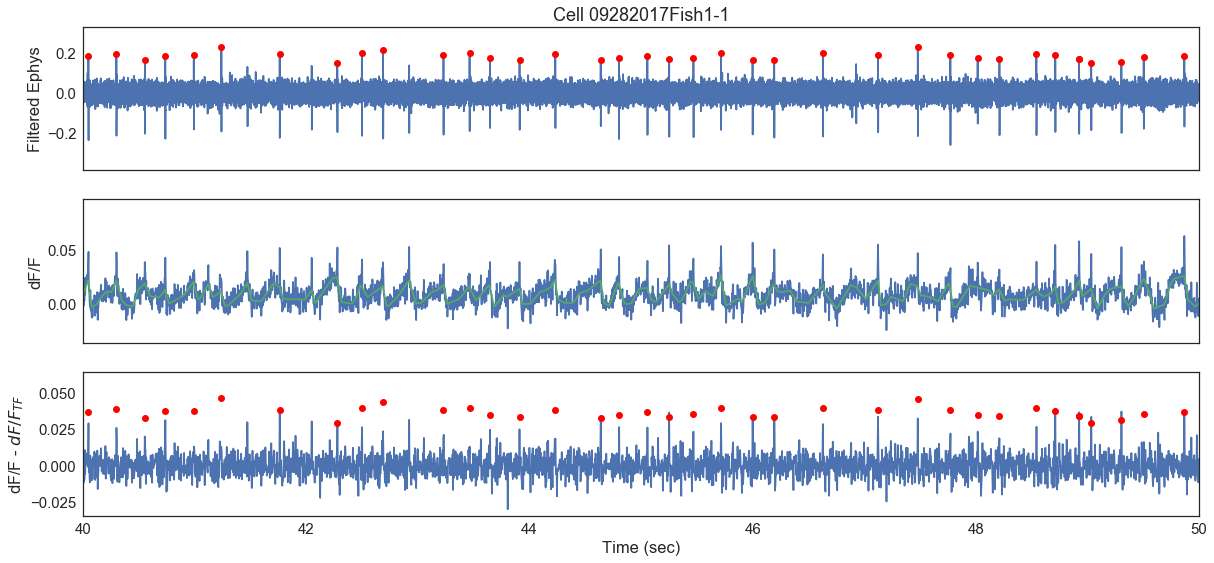

In [10]:
fig, ax = plt.subplots(3, 1, figsize = (20, 9), sharex='all')
ax[0].plot(np.arange(len(ephys))/6000, ephys)
ax[0].plot(spkTime/6000, ephys[spkTime], 'or')
ax[0].set_ylabel('Filtered Ephys')
ax[0].set_title('Cell 09282017Fish1-1')

ax[1].plot(frameTime/6000, voltr)
ax[1].plot(frameTime/6000, denoised_voltr)
ax[1].set_ylabel('dF/F')

ax[2].plot(frameTime/6000, voltr- denoised_voltr)
ax[2].plot(spkTime/6000, ephys[spkTime]/5, 'or')
ax[2].set_ylabel(r'dF/F - $dF/F_{TF}$')
ax[2].set_xlabel('Time (sec)')

ax[2].set_xlim([40, 50])
plt.show()

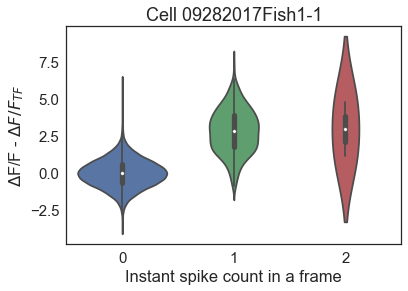

In [11]:
diff = (voltr - denoised_voltr)
diff = (diff - diff.mean())/diff.std()
diff = diff[1:]
# diff = np.array(denoised_voltr)[1:] - np.array(denoised_voltr)[:-1]
sns.violinplot(spk_counts, diff)
plt.xlabel('Instant spike count in a frame')
plt.ylabel(r'$\Delta$F/F - $\Delta F/F_{TF}$')
plt.title('Cell 09282017Fish1-1')
plt.show()

### Cell #3

In [12]:
folder = 'Data/SimultaneousEphys_TK/10052017Fish2-2/'
ephys = np.load(folder + 'ephys.npy')
frameTime = np.load(folder + 'frame_timing.npy')
voltr = np.load(folder + 'imaging_signal.npy') - 1
filt = TrendFilter(len(voltr))
denoised_voltr = filt.denoise(voltr)
# plt.figure(figsize=(20, 3))
# plt.plot(frameTime/6000, voltr)
# plt.plot(np.arange(len(ephys))/6000, ephys/20+0.07)
# plt.plot(frameTime/6000, denoised_voltr)
# # plt.ylim([-0.03, 0.07])
# # plt.xlim(20,25)
# plt.show()

In [13]:
ephys = ephys - np.percentile(ephys, 50)
thres = ephys.std() * 5
spkTime = spk_peaks(ephys, thres)
spk_counts, _ = np.histogram(spkTime, bins=frameTime)

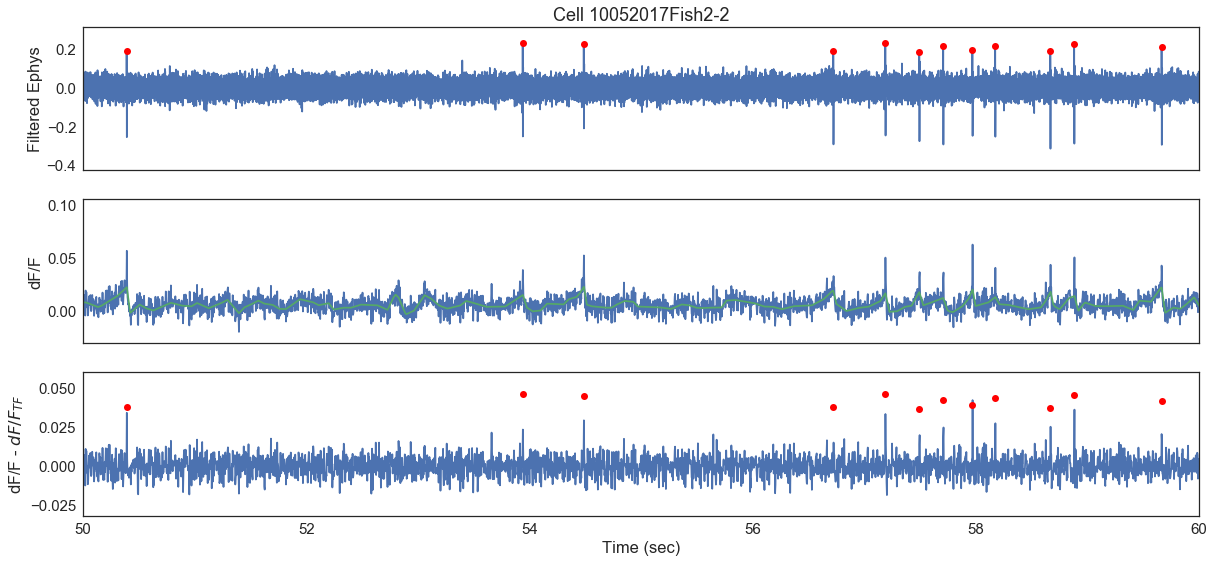

In [14]:
fig, ax = plt.subplots(3, 1, figsize = (20, 9), sharex='all')
ax[0].plot(np.arange(len(ephys))/6000, ephys)
ax[0].plot(spkTime/6000, ephys[spkTime], 'or')
ax[0].set_ylabel('Filtered Ephys')
ax[0].set_title('Cell 10052017Fish2-2')

ax[1].plot(frameTime/6000, voltr)
ax[1].plot(frameTime/6000, denoised_voltr)
ax[1].set_ylabel('dF/F')

ax[2].plot(frameTime/6000, voltr- denoised_voltr)
ax[2].plot(spkTime/6000, ephys[spkTime]/5, 'or')
ax[2].set_ylabel(r'dF/F - $dF/F_{TF}$')
ax[2].set_xlabel('Time (sec)')

ax[2].set_xlim([50, 60])
plt.show()

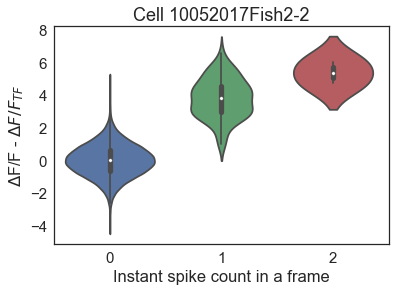

In [15]:
diff = (voltr - denoised_voltr)
diff = (diff - diff.mean())/diff.std()
diff = diff[1:]
# diff = np.array(denoised_voltr)[1:] - np.array(denoised_voltr)[:-1]
sns.violinplot(spk_counts, diff)
plt.xlabel('Instant spike count in a frame')
plt.ylabel(r'$\Delta$F/F - $\Delta F/F_{TF}$')
plt.title('Cell 10052017Fish2-2')
plt.show()